## Covid-19 Incidence Analysis

The objective of this code is to perform a complete data exploration task on the supplied <code>covid19_cases.csv</code>, trying to extract and plot significant information about the geographical incidence of the virus and focusing on an area of your particular interest.

We start by importing the dataset and check it by displaying the last first rows.

### Data exploration

In [75]:
#loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset
filename = 'covid19_cases.csv'
cvdc = pd.read_csv(filename)
data = cvdc.copy()

data.head()
# data.tail()
# data.shape

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,29/11/2020,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110
1,28/11/2020,28,11,2020,214,15,Afghanistan,AF,AFG,38041757.0,Asia,6.784650
2,27/11/2020,27,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.395604
3,26/11/2020,26,11,2020,200,12,Afghanistan,AF,AFG,38041757.0,Asia,7.341932
4,25/11/2020,25,11,2020,185,13,Afghanistan,AF,AFG,38041757.0,Asia,7.199983


We start with a general exploration of the loaded dataset, displaying general info (column names with their relevant data types and memory occupation) and statistical informations for all numerical columns.  

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58690 entries, 0 to 58689
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     58690 non-null  object 
 1   day                                                         58690 non-null  int64  
 2   month                                                       58690 non-null  int64  
 3   year                                                        58690 non-null  int64  
 4   cases                                                       58690 non-null  int64  
 5   deaths                                                      58690 non-null  int64  
 6   countriesAndTerritories                                     58690 non-null  object 
 7   geoId                                                       58430 non-null  object 
 

In [77]:
# We isolate relevant columns
percs = [.1, .2, .25, .3, .4, .6, .7, .75, .8, .9]
data[['cases', 'deaths', 'popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']].describe(percentiles=percs)


,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,58690.000000,58690.000000,5.858200e+04,55826.000000
mean,1061.016033,24.766246,4.125423e+07,59.561624
std,6037.235693,126.845720,1.537975e+08,149.157085
min,-8261.000000,-1918.000000,8.150000e+02,-147.419587
10%,0.000000,0.000000,9.711500e+04,0.000000
20%,0.000000,0.000000,6.138940e+05,0.284920
25%,0.000000,0.000000,1.324820e+06,0.674518
30%,0.000000,0.000000,2.172578e+06,1.223818
40%,3.000000,0.000000,4.783062e+06,3.031361
50%,14.000000,0.000000,7.813207e+06,6.339297


The maximums are extremely high, so we checked they corresponded to countries with high populations. They could be considered outliers.

In [78]:
max_cases = data['cases'].max()
cases_max_observation = data[data['cases'] == max_cases]

cases_max_observation

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
55972,28/11/2020,28,11,2020,207913,1404,United_States_of_America,US,USA,329064917.0,America,714.796345


In [79]:
max_deaths = data['deaths'].max()
deaths_max_observation = data[data['deaths'] == max_deaths]

deaths_max_observation

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
56198,16/04/2020,16,4,2020,30148,4928,United_States_of_America,US,USA,329064917.0,America,128.528743


The presence of negative data in the columns “cases,” “deaths,” and “Cumulative_number_for_14_days_of_COVID-19_cases_per_100000” reveals the presence of errors. 

The errors could be isolated and consequently it would be sufficient to remove the individual rows containing the negative data. 
However, the negative value could have affected the calculation of “Cumulative_number_for_14_days_of_COVID-19_cases_per_100000” for subsequent rows. In that case, removal of all rows related to that given country could be considered.


When we'll analyze the data, we will delete exclusively rows containing negative values in order not to lose data on cases and deaths, considering that the surrounding rows are not affected by the erroneous value, except for the Cumulative-Cases parameter.
When considering Cumulative-Cases parameter, it will be necessary to take into account the possible effect of erroneous values. 

In [80]:
data.describe(include=object)

,dateRep,countriesAndTerritories,geoId,countryterritoryCode,continentExp
count,58690,58690,58430,58582,58690
unique,335,214,213,212,6
top,11/11/2020,Australia,AT,AUT,Europe
freq,213,335,335,335,16547


We check the presence of NaN variables.

In [81]:
data.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          260
countryterritoryCode                                           108
popData2019                                                    108
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2864
dtype: int64

DA AGGIUNGERE SPIEGAZIONE PIU APPROFONDITA

Now we work on transforming categorical variables into numerical.

In [82]:
# We checked to see if the presence of NaN in geoId and countryterritoryCode would disturb the mapping
# We found it doesn't influence the code. 
# data = data.dropna(subset=['geoId', 'countryterritoryCode'])

data['countriesAndTerritories'].unique()
data['geoId'].unique()
data['countryterritoryCode'].unique()

data['continentExp'].unique() 
# Output only shows last array for clarity

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

In [83]:
countries_map = {v: c for c, v in enumerate(data['countriesAndTerritories'].unique())}
geoId_map = {v: c for c, v in enumerate(data['geoId'].unique())}
t_code_map = {v: c for c, v in enumerate(data['countryterritoryCode'].unique())}
continent_map = {v: c for c, v in enumerate(data['continentExp'].unique())}



In [84]:
# We now change the columns to work with them as numbers and not as strings
data['countriesAndTerritories'] = data['countriesAndTerritories'].map(countries_map)
data['geoId'] = data['geoId'].map(geoId_map)
data['countryterritoryCode'] = data['countryterritoryCode'].map(t_code_map)
data['continentExp'] = data['continentExp'].map(continent_map)

data.head()


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,29/11/2020,29,11,2020,228,11,0,0,0,38041757.0,0,6.845110
1,28/11/2020,28,11,2020,214,15,0,0,0,38041757.0,0,6.784650
2,27/11/2020,27,11,2020,0,0,0,0,0,38041757.0,0,6.395604
3,26/11/2020,26,11,2020,200,12,0,0,0,38041757.0,0,7.341932
4,25/11/2020,25,11,2020,185,13,0,0,0,38041757.0,0,7.199983


OPTIONAL SECTION

The identifying information appears to be redundant, consequently we propose a method for removing unnecessary columns.  
Should the codes in the removed columns turn out to be necessary, it is always possible to derive them via the mapping variables.  
In any case it's possible to avoid effecting the column removal.

In [85]:
#We use this to make sure the rows are in ascending order, in order to use the break function in the next step to reduce run time 
is_sorted = data['countriesAndTerritories'].is_monotonic_increasing
is_sorted

True

In [86]:
flag = 0; 

# we check each country
for i in range(len(countries_map)): 
    for u in range(len(data['countriesAndTerritories'])):
        # we check every row relative to that country
        if data['countriesAndTerritories'][u] == i:
            # We check both columns together, but we could check separately to see if just one colums is redundant
            if i==data['geoId'][u] & i==data['countryterritoryCode'][u]:
                flag+=0
            else:
                flag+=1
        # to avoid checking every row in the dataset we break the for cicle if the country is not the same as i
        # this is possible because we are sure that the dataset in arranged alphabetical order 
        else: 
            break; 
    
    # print('Iterazione ' + str(i) + ' terminata') to check if it's working correctly

print(flag)

0


In [87]:
if flag == 0: 
    data = data.drop(['geoId', 'countryterritoryCode'], axis = 1)

data.head()



,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,29/11/2020,29,11,2020,228,11,0,38041757.0,0,6.845110
1,28/11/2020,28,11,2020,214,15,0,38041757.0,0,6.784650
2,27/11/2020,27,11,2020,0,0,0,38041757.0,0,6.395604
3,26/11/2020,26,11,2020,200,12,0,38041757.0,0,7.341932
4,25/11/2020,25,11,2020,185,13,0,38041757.0,0,7.199983


In [88]:
# We checked the new dataset comparing it to the original
check = cvdc[['cases', 'deaths', 'continentExp']] == data[['cases', 'deaths', 'continentExp']]
check

has_false = (check == False).any().any()

if has_false:
    print("There are cells with value False in the dataset.")
else:
    print("There are no cells with value False in the dataset.")

There are cells with value False in the dataset.


END OF OPTIONAL SECTION

We convert the dateRep in datetime format instead of object format. 

In [89]:
data['dateRep'] = pd.to_datetime(data['dateRep'], format='%d/%m/%Y'); 


# Now we can remove day, month, year since we can use dateRep to retrieve all the informations needed
data = data.drop(['day', 'month', 'year'], axis = 1)

data.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-11-29,228,11,0,38041757.0,0,6.845110
1,2020-11-28,214,15,0,38041757.0,0,6.784650
2,2020-11-27,0,0,0,38041757.0,0,6.395604
3,2020-11-26,200,12,0,38041757.0,0,7.341932
4,2020-11-25,185,13,0,38041757.0,0,7.199983


### Extraction and plotting of significant information

#### Continents

We want to plot the number of cases and deaths per continent. 
Since we want to normalize by population, we drop the territory for which we have no information (in popData2019 is NaN).  
We noticed that there's only two territory that have NaN popData and one territory that has also "other" as a continent, so we drop those rows. 

In [90]:
popNaN = data[data['popData2019'].isna()]
popNaN

# If there were countries with NaN in popData in only a few rows, they could not be removed since the information is present 
# identically in every single row related to the given territory. 
# The only ones that should be removed are those where the data is completely absent.

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
10372,2020-03-10,-9,1,37,NaN,5,NaN
10373,2020-03-02,0,0,37,NaN,5,NaN
10374,2020-03-01,0,0,37,NaN,5,NaN
10375,2020-02-29,0,2,37,NaN,5,NaN
10376,2020-02-28,0,0,37,NaN,5,NaN
...,...,...,...,...,...,...,...
57723,2020-10-21,0,0,209,NaN,4,NaN
57724,2020-10-20,0,0,209,NaN,4,NaN
57725,2020-10-19,0,0,209,NaN,4,NaN
57726,2020-10-18,0,0,209,NaN,4,NaN


In [91]:
othercontinent = data[data['continentExp'] == 5]
othercontinent


,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
10372,2020-03-10,-9,1,37,NaN,5,NaN
10373,2020-03-02,0,0,37,NaN,5,NaN
10374,2020-03-01,0,0,37,NaN,5,NaN
10375,2020-02-29,0,2,37,NaN,5,NaN
10376,2020-02-28,0,0,37,NaN,5,NaN
...,...,...,...,...,...,...,...
10431,2020-01-04,0,0,37,NaN,5,NaN
10432,2020-01-03,0,0,37,NaN,5,NaN
10433,2020-01-02,0,0,37,NaN,5,NaN
10434,2020-01-01,0,0,37,NaN,5,NaN


In [92]:
data = data.dropna(subset = ['popData2019'], axis = 0)

print(cvdc.shape)
data.shape

(58690, 12)


(58582, 7)

In [93]:
othercontinent = data[data['continentExp'] == 5]
othercontinent

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000


Now it's necessary to clean the dataset, removing rows that contain negative values.

In [94]:
data = data[data['cases'] >= 0] 
data = data[data['deaths'] >= 0]
data = data[data['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] >= 0]


data[['cases', 'deaths', 'popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']].describe()


,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,55764.000000,55764.000000,5.576400e+04,55764.000000
mean,1116.673660,26.024496,4.153584e+07,59.640892
std,6188.452797,128.726619,1.545001e+08,149.195964
min,0.000000,0.000000,8.150000e+02,0.000000
25%,0.000000,0.000000,1.324820e+06,0.681803
50%,19.000000,0.000000,7.813207e+06,6.348782
75%,284.000000,4.000000,2.860872e+07,47.048676
max,207913.000000,4928.000000,1.433784e+09,1900.836210


It's now important to calculate total population, total cases and total deaths of each continent.

In [95]:
tot_pop = np.zeros((5))

for i in range(5):
    data_continent = data[data['continentExp'] == i ]
    data_grouped = data_continent.groupby('countriesAndTerritories', as_index = False).first()

    tot_pop[i] = data_grouped['popData2019'].sum()
    print("Total population:", tot_pop[i])



Total population: 4460056021.0
Total population: 848216220.0
Total population: 1306903030.0
Total population: 1013601796.0
Total population: 41467380.0


In [96]:
tot_cases = np.zeros((5))

for i in range(5):
    data_continent = data[data['continentExp'] == i ]

    tot_cases[i] = data_continent['cases'].sum()
    print("Total cases:", tot_cases[i])

Total cases: 15602324.0
Total cases: 17831614.0
Total cases: 2149351.0
Total cases: 26635742.0
Total cases: 51159.0


In [97]:
tot_deaths = np.zeros((5))

for i in range(5):
    data_continent = data[data['continentExp'] == i ]

    tot_deaths[i] = data_continent['deaths'].sum()
    print("Total deaths:", tot_deaths[i])

Total deaths: 271380.0
Total deaths: 406350.0
Total deaths: 51442.0
Total deaths: 720933.0
Total deaths: 1125.0


Below are shown plots display number of cases and for each continents.  
The graphs were also made with the data normalized against the total population number.

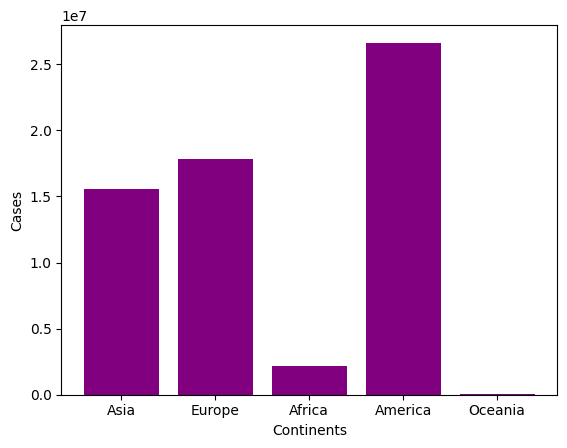

In [98]:
continents = ['Asia', 'Europe', 'Africa', 'America', 'Oceania']

plt.bar(continents, tot_cases, color = 'purple')
plt.xlabel('Continents')
plt.ylabel('Cases')
plt.show()



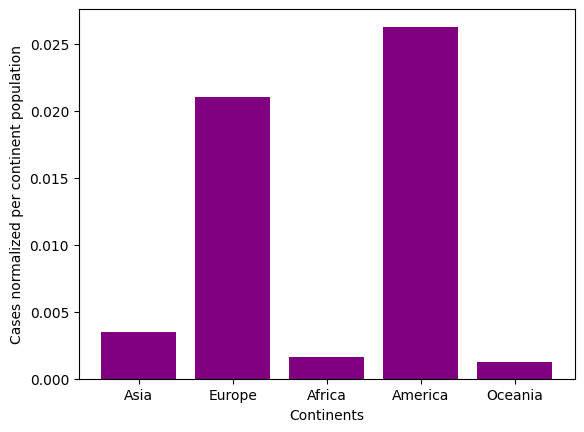

In [99]:
normalized_cases = tot_cases/tot_pop
plt.bar(continents, normalized_cases, color = 'purple')
plt.xlabel('Continents')
plt.ylabel('Cases normalized per continent population')
plt.show()


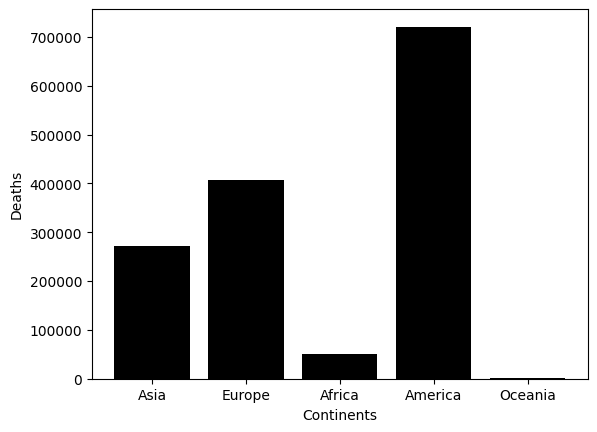

In [100]:
plt.bar(continents, tot_deaths, color = 'black')
plt.xlabel('Continents')
plt.ylabel('Deaths')
plt.show()


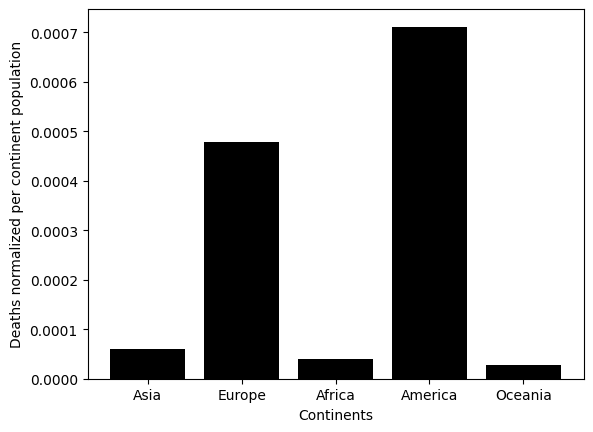

In [101]:
normalized_deaths = tot_deaths/tot_pop
plt.bar(continents, normalized_deaths, color = 'black')
plt.xlabel('Continents')
plt.ylabel('Deaths normalized per continent population')
plt.show()


A pivot table was made to show the data sorted by continent and country.

In [102]:
thepivot = data.pivot_table(values=['cases', 'deaths'],index=['continentExp','countriesAndTerritories', 'popData2019'], aggfunc=np.sum)
thepivot  

C:\Users\sanna\AppData\Local\Temp\ipykernel_23524\2839754096.py:1: FutureWarning: The provided callable <function sum at 0x0000015B7F791F80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  thepivot = data.pivot_table(values=['cases', 'deaths'],index=['continentExp','countriesAndTerritories', 'popData2019'], aggfunc=np.sum)


cases  deaths
continentExp countriesAndTerritories popData2019                
0            0                       38041757.0    45844    1763
             14                      1641164.0     86645     341
             15                      163046173.0  460571    6575
             22                      763094.0        393       0
             29                      433296.0         62       3
...                                                  ...     ...
4            140                     4783062.0      1694      25
             145                     57213.0          93       0
             151                     8776119.0       644       7
             176                     669821.0          9       0
             206                     299882.0          0       0

[212 rows x 2 columns]

It is possible to calculate the correlation matrix, a symmetric matrix that shows the correlation among pairs of data features: values close to 1.0 highlight strong positive correlation between the selected features meaning that both features move in the same direction, whereas negative values imply variations in opposite directions.

As expected, number of cases and number of deaths all strongly correlate positively with each other. 

In [103]:
data.loc[:,['cases','deaths']].corr()

,cases,deaths
cases,1.000000,0.730295
deaths,0.730295,1.000000


#### Europe

We are now going to analyze geographical incidence of the virus focusing only on Europe.  
We choose to reverse the categorical-numerical conversion to see the specific countries we are working on.

In [104]:
inv_countries_map = {v: k for k, v in countries_map.items()}

data['countriesAndTerritories'] = data['countriesAndTerritories'].map(inv_countries_map)
data.head()


,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-11-29,228,11,Afghanistan,38041757.0,0,6.845110
1,2020-11-28,214,15,Afghanistan,38041757.0,0,6.784650
2,2020-11-27,0,0,Afghanistan,38041757.0,0,6.395604
3,2020-11-26,200,12,Afghanistan,38041757.0,0,7.341932
4,2020-11-25,185,13,Afghanistan,38041757.0,0,7.199983


Now we retrieve the value associated with Europe and we create a dataset containing only European countries.

In [105]:
europe_number = continent_map['Europe']
europe_number

1

In [106]:
europe_data = data[data['continentExp'] == europe_number]
europe_data = europe_data.drop(['dateRep', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis = 1)

europe_data

,cases,deaths,countriesAndTerritories,popData2019,continentExp
325,545,16,Albania,2862427.0,1
326,645,18,Albania,2862427.0,1
327,656,10,Albania,2862427.0,1
328,644,8,Albania,2862427.0,1
329,744,19,Albania,2862427.0,1
...,...,...,...,...,...
55695,0,0,United_Kingdom,66647112.0,1
55696,0,0,United_Kingdom,66647112.0,1
55697,0,0,United_Kingdom,66647112.0,1
55698,0,0,United_Kingdom,66647112.0,1


For each country we want to display its name, total number of cases, total number of deaths and the total population.

In [107]:
europe_data1 = europe_data.groupby('countriesAndTerritories', as_index = False)['cases'].sum()
europe_data2 = europe_data.groupby('countriesAndTerritories', as_index = False)['deaths'].sum()
europe_data3 = europe_data.groupby('countriesAndTerritories', as_index = False)['popData2019'].first()


europe_data_tot = pd.concat([europe_data1, europe_data2, europe_data3], axis = 1)
europe_data_tot = europe_data_tot.T.drop_duplicates().T

europe_data_tot

,countriesAndTerritories,cases,deaths,popData2019
0,Albania,36720,785,2862427.0
1,Andorra,6482,76,76177.0
2,Armenia,134768,2142,2957728.0
3,Austria,274275,2822,8858775.0
4,Azerbaijan,114025,1323,10047719.0
5,Belarus,133324,1143,9452409.0
6,Belgium,574352,16461,11455519.0
7,Bosnia_and_Herzegovina,85267,2540,3300998.0
8,Bulgaria,141584,3746,7000039.0
9,Croatia,123693,1655,4076246.0


Calculating the correlation matrix again, we confirm a strong positive correlation between number of cases, number of deaths.

Given that the population values in this case are present only once for each state, it was included in the correlation matrix. 
The correlation with cases and deaths also depends in part on how the spread of the virus was managed and is consequently slightly lower. However, larger population results in a larger number of cases and therefore deaths, so the correlation remains positive.

In [108]:
europe_data_tot.loc[:,['cases','deaths','popData2019']].corr()

,cases,deaths,popData2019
cases,1.000000,0.947297,0.880183
deaths,0.947297,1.000000,0.776731
popData2019,0.880183,0.776731,1.000000


The following figure displays violin plots for some cases and deaths.

<Axes: >

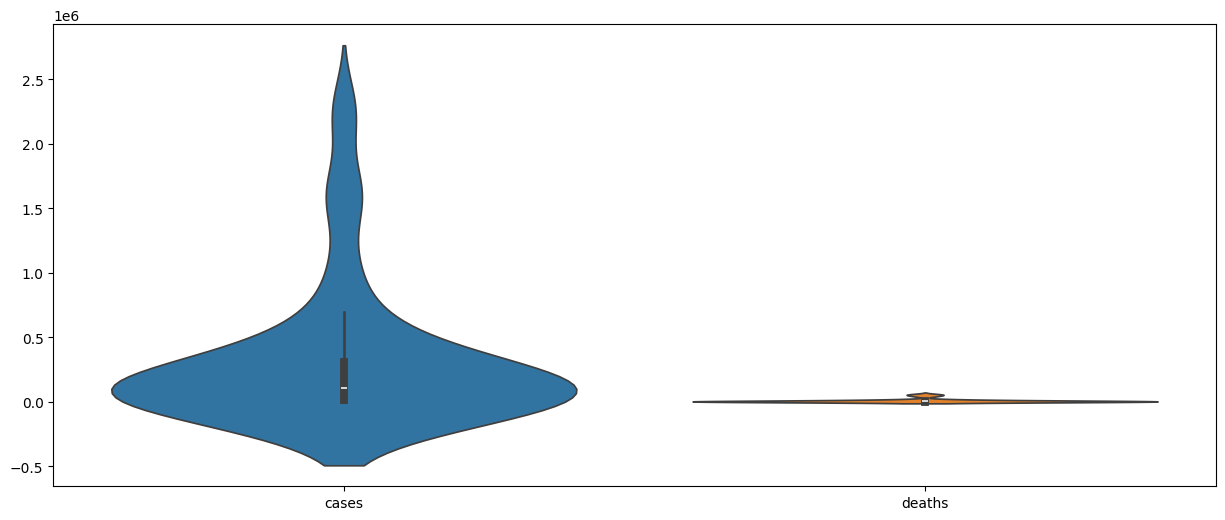

In [109]:
fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(data=europe_data_tot.loc[:,['cases','deaths']], ax=ax)

Our focus are highly-populated european countries. Following the narrowing of the dataset, plots that display cases and deaths normalized per population for each considered country are shown.

In [110]:
europe_data_tot = europe_data_tot[europe_data_tot['popData2019'] >= 20000000] 
europe_data_tot

,countriesAndTerritories,cases,deaths,popData2019
16,France,2209465,52020,67012883.0
18,Germany,1042700,16123,83019213.0
27,Italy,1564103,54347,60359546.0
41,Poland,973355,16741,37972812.0
44,Russia,2269316,39527,145872260.0
49,Spain,1626121,46178,46937060.0
52,Turkey,485479,13314,82003882.0
53,Ukraine,693294,11905,43993643.0
54,United_Kingdom,1605172,58030,66647112.0


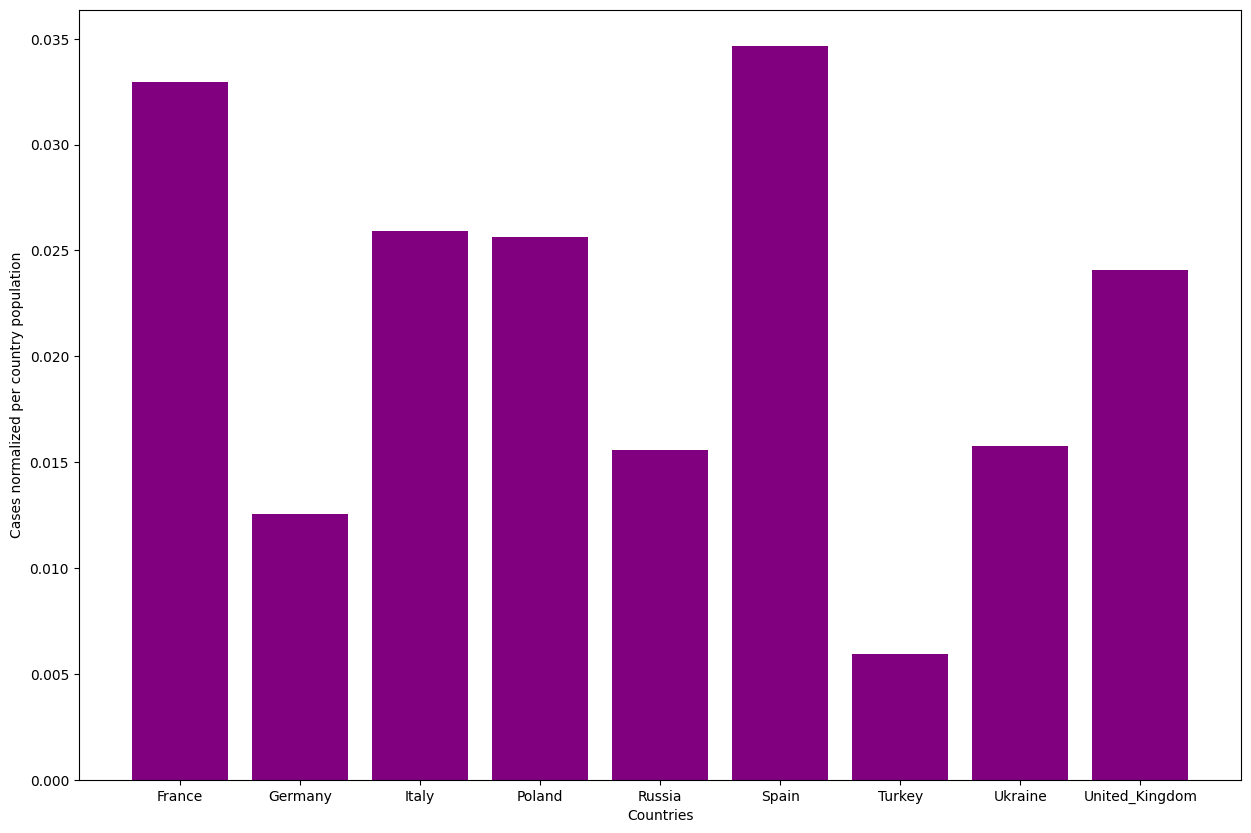

In [111]:
normalized_cases_europe = europe_data_tot['cases']/europe_data_tot['popData2019']

plt.figure(figsize = (15, 10)) 
plt.bar(europe_data_tot['countriesAndTerritories'], normalized_cases_europe, color = 'purple')
plt.xlabel('Countries')
plt.ylabel('Cases normalized per country population')
plt.show()

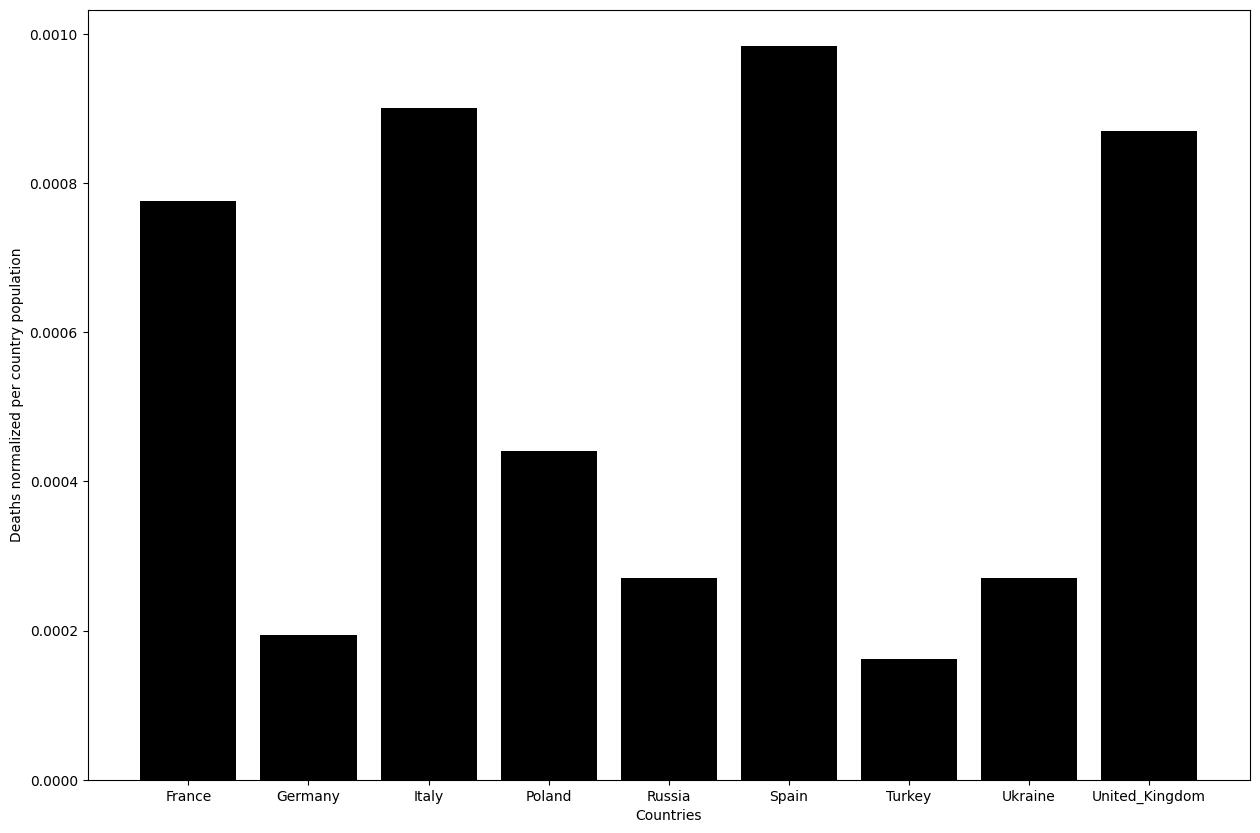

In [112]:
normalized_deaths_europe = europe_data_tot['deaths']/europe_data_tot['popData2019']
plt.figure(figsize = (15, 10)) 

plt.bar(europe_data_tot['countriesAndTerritories'], normalized_deaths_europe, color = 'black')
plt.xlabel('Countries')
plt.ylabel('Deaths normalized per country population')
plt.show()

#### Italy

Focusing on an even narrower area, we analyzed the time trends of cases and deaths in Italy. 
We began by defining a dataset containing only rows related to the selected country.  
We also calculated significant parameters, such as total cases and total deaths.

In [113]:
data_italy = data[data['countriesAndTerritories'] == 'Italy']
data_italy

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
27614,2020-11-29,26315,686,Italy,60359546.0,1,695.797149
27615,2020-11-28,28342,827,Italy,60359546.0,1,713.911930
27616,2020-11-27,29001,822,Italy,60359546.0,1,734.720569
27617,2020-11-26,25852,722,Italy,60359546.0,1,749.591457
27618,2020-11-25,23227,853,Italy,60359546.0,1,761.369212
...,...,...,...,...,...,...,...
27931,2020-01-17,0,0,Italy,60359546.0,1,0.000000
27932,2020-01-16,0,0,Italy,60359546.0,1,0.000000
27933,2020-01-15,0,0,Italy,60359546.0,1,0.000000
27934,2020-01-14,0,0,Italy,60359546.0,1,0.000000


In [114]:
italy_cases = data_italy['cases'].sum()
print(italy_cases)

italy_deaths = data_italy['deaths'].sum()
print(italy_deaths)

1564103
54347


In [115]:
data_italy = data_italy.dropna(subset = ['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis = 0)
data_italy

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
27614,2020-11-29,26315,686,Italy,60359546.0,1,695.797149
27615,2020-11-28,28342,827,Italy,60359546.0,1,713.911930
27616,2020-11-27,29001,822,Italy,60359546.0,1,734.720569
27617,2020-11-26,25852,722,Italy,60359546.0,1,749.591457
27618,2020-11-25,23227,853,Italy,60359546.0,1,761.369212
...,...,...,...,...,...,...,...
27931,2020-01-17,0,0,Italy,60359546.0,1,0.000000
27932,2020-01-16,0,0,Italy,60359546.0,1,0.000000
27933,2020-01-15,0,0,Italy,60359546.0,1,0.000000
27934,2020-01-14,0,0,Italy,60359546.0,1,0.000000


Graphs of the time trend of cases and deaths in Italy are shown.  

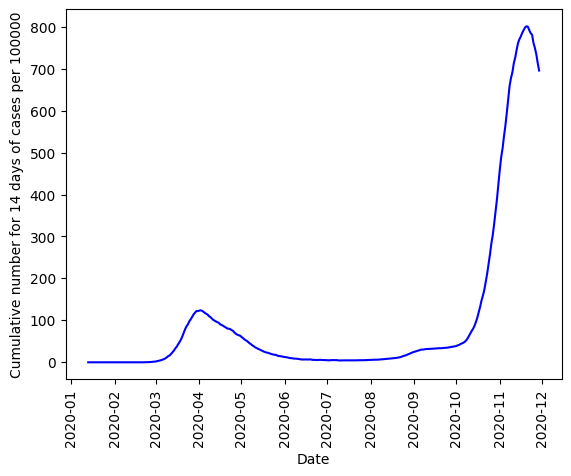

In [116]:
plt.plot(data_italy['dateRep'], data_italy['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Cumulative number for 14 days of cases per 100000')

plt.show()

It is important to keep in mind that the Cumulative-Cases parameter is affected by the original presence of negative data, now removed. 
Comparison with the subsequent graphs, made with the number of cases and deaths and consequently unaffected by the erroneous data, shows a strong correlation and thus shows that it is acceptable to consider the Cumulative-Cases parameter.

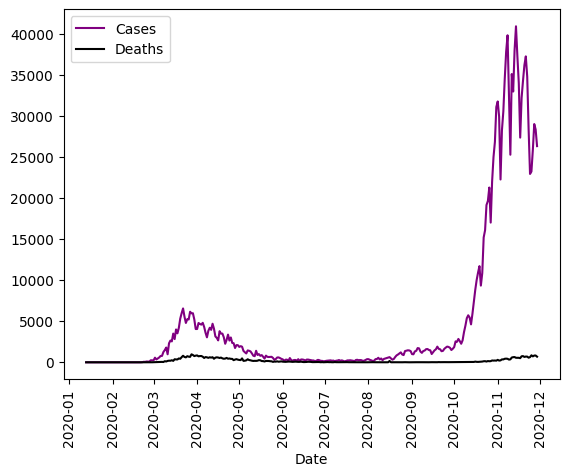

In [117]:
plt.plot(data_italy['dateRep'], data_italy['cases'], color = 'purple', label = 'Cases')
plt.plot(data_italy['dateRep'], data_italy['deaths'], color = 'black', label = 'Deaths')

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.legend()

plt.show()

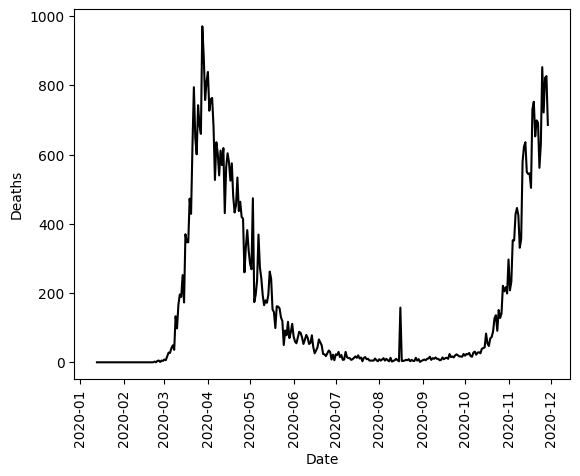

In [118]:
plt.plot(data_italy['dateRep'], data_italy['deaths'], color = 'black')

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Deaths')

plt.show()